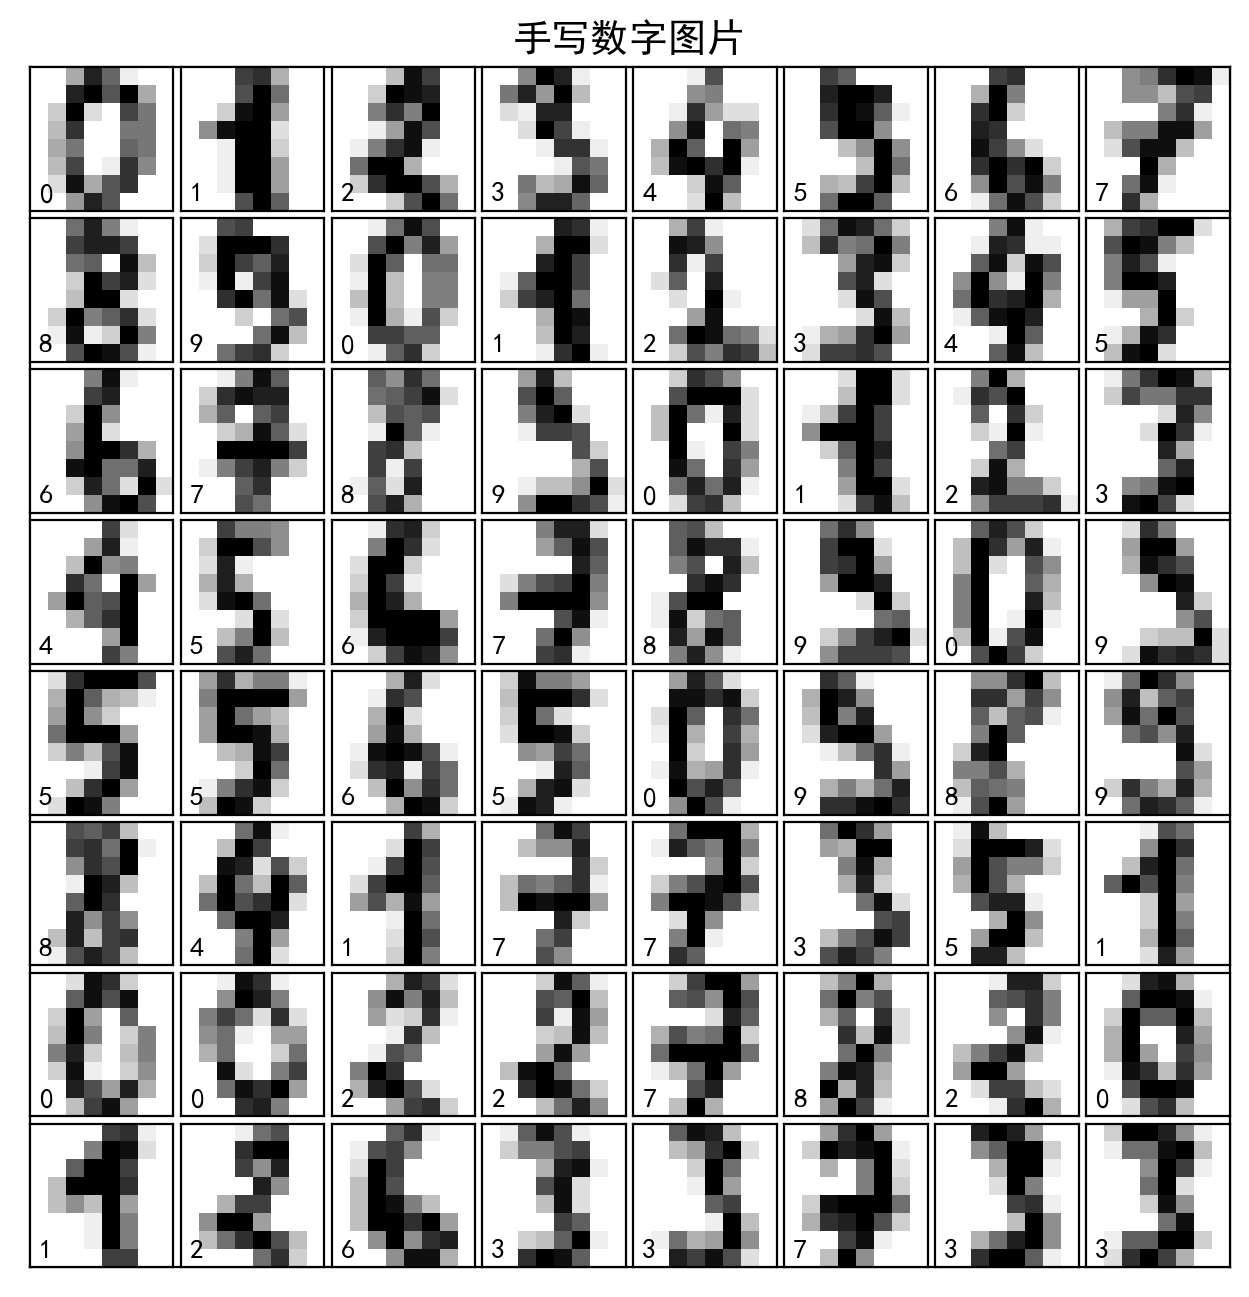

In [30]:
'''绘制数据集的图片概览'''
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
fig=plt.figure(dpi=200,figsize=(6,6))
fig.subplots_adjust(left=1,right=2,bottom=0,top=1,hspace=0.05,wspace=0.05)
digits=load_digits()
plt.rcParams['font.family']=['SimHei']
plt.title('手写数字图片',size=14)
plt.xticks([])
plt.yticks([])
for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary)
    ax.text(0,7,str(digits.target[i]))
plt.show()


In [5]:
'''逻辑回归函数手动平面调参，图像绘制，报表生成'''
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,ParameterGrid
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
import numpy as np
data=load_digits()
X=data.data
y=data.target
x=StandardScaler().fit_transform(X)
# y=label_binarize(y,classes=list(range(10)))
model=LogisticRegression(random_state=42,multi_class='ovr',max_iter=100000)
params={}
# params['penalty']=['l1','l2','elasticnet','none']
# params['l1_ratio']=np.array(range(10))/10
params['C']=np.array(range(1,5))
params['solver']=['liblinear','lbfgs','newton-cg','sag','saga']
# params=ParameterGrid(params)
clf=GridSearchCV(model,params,return_train_score=True,cv=5,error_score=0,n_jobs=-1)
clf.fit(x,y)

GridSearchCV(cv=5, error_score=0,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]),
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [89]:
'''到处交叉验证结果'''
result=clf.cv_results_


In [90]:
'''提取并分析验证结果'''
for p,s in zip(result['params'],result['mean_test_score']):
    print(p,s)

{'C': 1, 'solver': 'liblinear'} 0.9215358931552587
{'C': 1, 'solver': 'lbfgs'} 0.9226488592097941
{'C': 1, 'solver': 'newton-cg'} 0.9226488592097941
{'C': 1, 'solver': 'sag'} 0.9220923761825265
{'C': 1, 'solver': 'saga'} 0.9243183082915971
{'C': 2, 'solver': 'liblinear'} 0.9181969949916527
{'C': 2, 'solver': 'lbfgs'} 0.9204229271007234
{'C': 2, 'solver': 'newton-cg'} 0.9204229271007234
{'C': 2, 'solver': 'sag'} 0.9220923761825265
{'C': 2, 'solver': 'saga'} 0.9226488592097941
{'C': 3, 'solver': 'liblinear'} 0.9187534780189204
{'C': 3, 'solver': 'lbfgs'} 0.9209794101279911
{'C': 3, 'solver': 'newton-cg'} 0.9209794101279911
{'C': 3, 'solver': 'sag'} 0.9204229271007234
{'C': 3, 'solver': 'saga'} 0.9220923761825265
{'C': 4, 'solver': 'liblinear'} 0.9170840289371174
{'C': 4, 'solver': 'lbfgs'} 0.9215358931552587
{'C': 4, 'solver': 'newton-cg'} 0.9215358931552587
{'C': 4, 'solver': 'sag'} 0.9220923761825265
{'C': 4, 'solver': 'saga'} 0.9220923761825265


In [87]:
'''数据处理并分析结果'''
import pandas as pd
panda_result=pd.DataFrame.from_dict(result)


In [81]:
import pandas as pd
panda_result=pd.DataFrame.from_dict(result)
panda_result.to_excel('panda_data3.xls')

In [73]:
result=clf.cv_results_
test1=np.array(result['param_C']==1)
test2=np.array(result['param_solver']=='sag')
print(test1)
print(test2)
test3=~((~test1)+(~test2))

[ True  True  True  True  True False False False False False False False
 False False False False False False False False]
False


In [82]:
print(panda_result['param_solver'])

0     saga
1     saga
2     saga
3     saga
4     saga
5     saga
6     saga
7     saga
8     saga
9     saga
10    saga
11    saga
12    saga
13    saga
14    saga
15    saga
16    saga
17    saga
18    saga
19    saga
Name: param_solver, dtype: object


In [95]:
result2=clf.cv_results_
result3=pd.DataFrame.from_dict(result2)
with open('like.csv','w') as f:
    result3.to_csv(f)

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import DigitEnsembleClassifier
model=LogisticRegression(random_state=42,multi_class='ovr',max_iter=100000)
params={}
params['solver']=['saga','lbfgs']
params['C']=list(range(1,3))
params['penalty']=['l1','l2']
clf=DigitEnsembleClassifier(model=model,paramset=params,cv=3)
clf.export('test')
xlabel='C'
plotlikeconfig(xlabel=xlabel)
plt.grid()
x,y,label1=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_train_score')
plt.plot(x,y)
x,y,label2=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_test_score')
lable=[label1,label2]
plt.legend(lable)
plt.show()

<Figure size 1280x960 with 1 Axes>

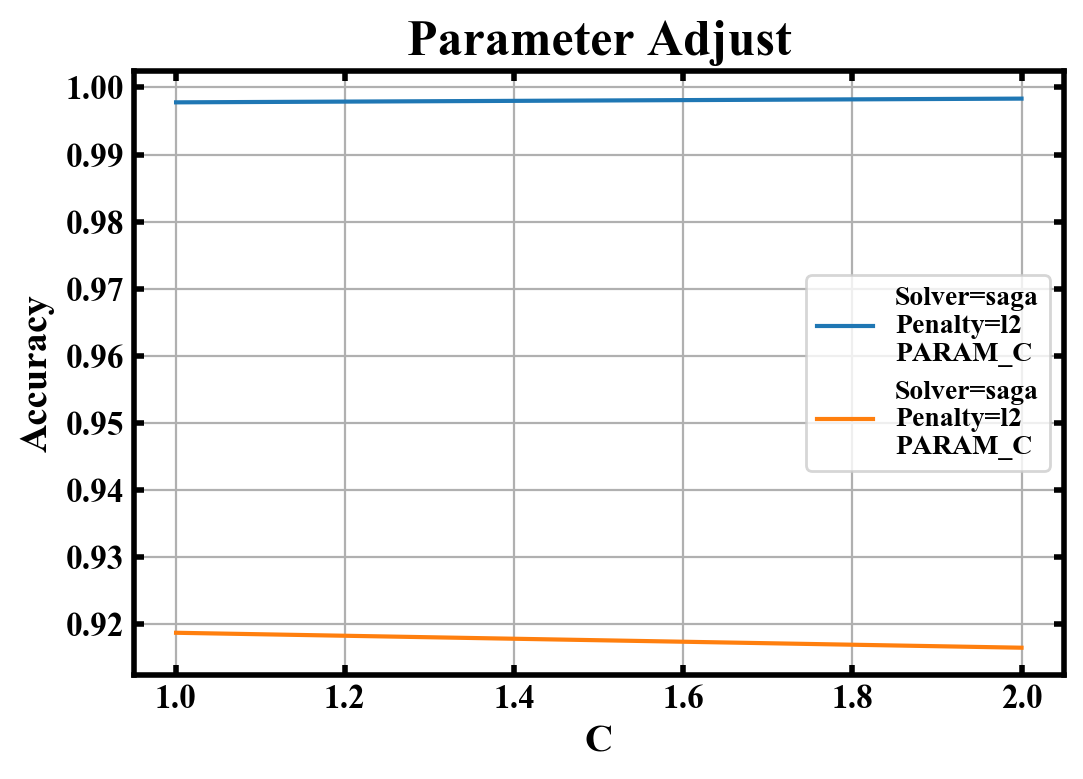

In [4]:
xlabel='C'
plotlikeconfig(xlabel=xlabel)
plt.grid()
x,y,label1=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_train_score')
plt.plot(x,y)
x,y,label2=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_test_score')
plt.plot(x,y)
lable=[label1,label2]
plt.legend(lable)
plt.show()

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import DigitEnsembleClassifier
model=LogisticRegression(random_state=42,multi_class='ovr',max_iter=100000,class_weight='balanced')
params={}
params['solver']=['saga','lbfgs','sag','newton-cg','liblinear']
params['C']=list(range(1,10,2))
params['penalty']=['l1','l2','none']
clf=DigitEnsembleClassifier(model=model,paramset=params,cv=3)
clf.export('test')

<Figure size 1280x960 with 1 Axes>

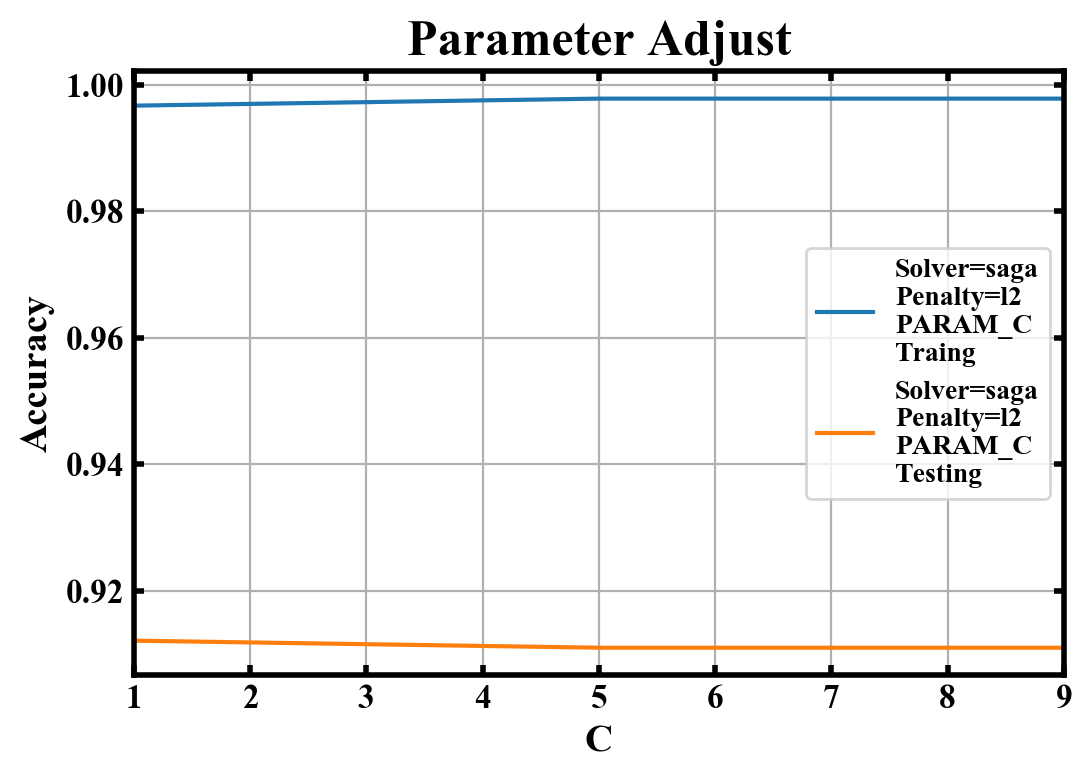

In [9]:
xlabel='C'
plotlikeconfig(xlabel=xlabel)
plt.grid()
x,y,label1=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_train_score')
plt.plot(x,y)
x,y,label2=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_test_score')
plt.plot(x,y)
label1=label1+'\nTraing'
label2=label2+'\nTesting'
lable=[label1,label2]
plt.xlim(min(x),max(x))
plt.legend(lable)
plt.show()

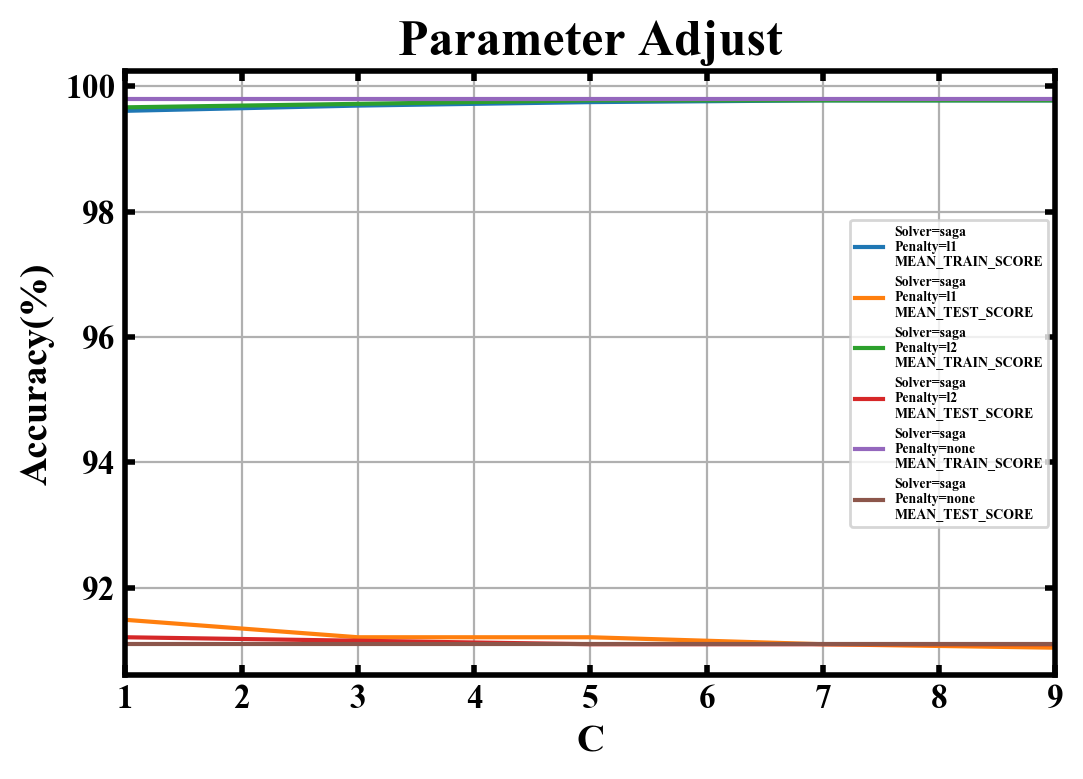

In [11]:
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt

xlabel='C'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)')
plt.grid()
C=['l1','l2','none']
label=[]
ax=plt.gca()
for i in C:
    x,y,label_temp=linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2=i,target='mean_train_score')
    plt.plot(x,y*100)
    label.append(label_temp)
    x,y,label_temp=linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2=i,target='mean_test_score')
    plt.plot(x,y*100)
    label.append(label_temp)
plt.xlim(min(x),max(x))
plt.legend(label,fontsize=5)
plt.show()
